In [4]:
# Importamos algunas librearias a utilizar
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

# Datos

In [5]:
# Cargamos los datos en Pandas DataFrame
data = pd.read_csv('Pearson_Crab_Data.csv')

In [6]:
# Visualizamos los datos
data

,ratio,freq
0,0.5835,1
1,0.5875,3
2,0.5915,5
3,0.5955,2
4,0.5995,7
5,0.6035,10
6,0.6075,13
7,0.6115,19
8,0.6155,20
9,0.6195,25


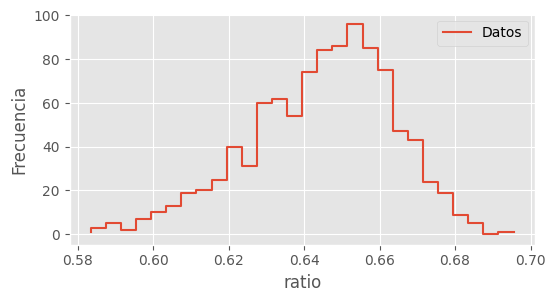

In [7]:
# Graficamos las frecuencias
plt.figure(figsize=(6, 3))
plt.step(x=data['ratio'],y=data['freq'], label='Datos')
plt.legend()
plt.xlabel('ratio')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
# Creamos una columna de frequencia relativa
data['freq_rel'] = data['freq'] / data['freq'].sum()

In [9]:
# Visualizamos nuevamente los datos
data.head()

,ratio,freq,freq_rel
0,0.5835,1,0.001
1,0.5875,3,0.003
2,0.5915,5,0.005
3,0.5955,2,0.002
4,0.5995,7,0.007


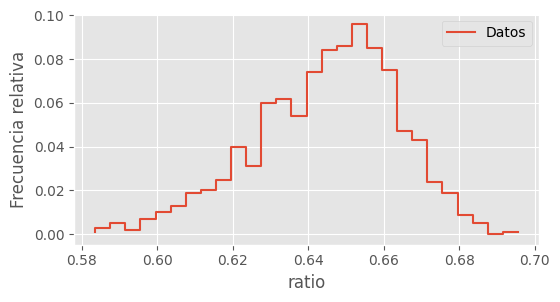

In [11]:
# Graficamos las frecuencias relativas
plt.figure(figsize=(6, 3))
plt.step(x=data['ratio'],y=data['freq_rel'], label='Datos')
plt.legend()
plt.xlabel('ratio')
plt.ylabel('Frecuencia relativa')
plt.show()

In [10]:
# Calculamos la longitud del intervalo en el rango de ratio
data['delta_ratio'] = data['ratio'].diff()

In [12]:
# Visualizamos nuevamente los datos
display(data.head())
display(data.tail())

,ratio,freq,freq_rel,delta_ratio
0,0.5835,1,0.001,NaN
1,0.5875,3,0.003,0.004
2,0.5915,5,0.005,0.004
3,0.5955,2,0.002,0.004
4,0.5995,7,0.007,0.004


,ratio,freq,freq_rel,delta_ratio
24,0.6795,19,0.019,0.004
25,0.6835,9,0.009,0.004
26,0.6875,5,0.005,0.004
27,0.6915,0,0.000,0.004
28,0.6955,1,0.001,0.004


In [13]:
# Creamos una columna de densidad = (frecuencia reativa) / (longitud)
data['densidad'] = data['freq_rel'] / data['delta_ratio']

In [14]:
# Visualizamos nuevamente los datos
data

,ratio,freq,freq_rel,delta_ratio,densidad
0,0.5835,1,0.001,NaN,NaN
1,0.5875,3,0.003,0.004,0.75
2,0.5915,5,0.005,0.004,1.25
3,0.5955,2,0.002,0.004,0.50
4,0.5995,7,0.007,0.004,1.75
5,0.6035,10,0.010,0.004,2.50
6,0.6075,13,0.013,0.004,3.25
7,0.6115,19,0.019,0.004,4.75
8,0.6155,20,0.020,0.004,5.00
9,0.6195,25,0.025,0.004,6.25


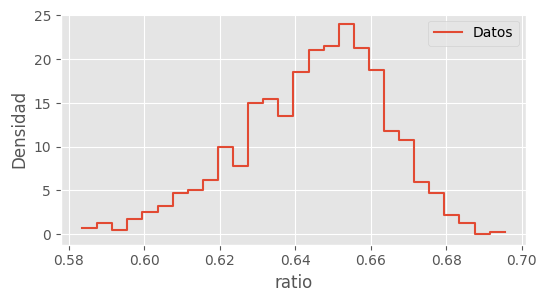

In [15]:
# Graficamos la densidad
plt.figure(figsize=(6, 3))
plt.step(x=data['ratio'],y=data['densidad'], label='Datos')
plt.legend()
plt.xlabel('ratio')
plt.ylabel('Densidad')
plt.show()

# Un modelos simple: una gaussiana

Considera la siguiente celda de código: ¿puedes encontrar valores de *mu* y *sigma* para que la curva gaussiana aproxime la densidad de los datos?

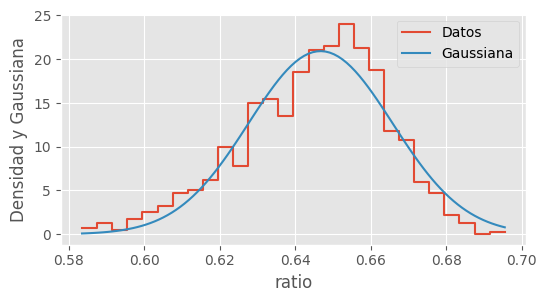

In [25]:
import scipy

mu = (data['ratio'] * data['freq_rel']).sum() 
sigma = np.sqrt((((data['ratio'] - mu)**2) * data['freq_rel']).sum())

# Graficamos la densidad junto con la gaussiana
plt.figure(figsize=(6, 3))
plt.step(x=data['ratio'],y=data['densidad'], label='Datos')
r = np.linspace(data['ratio'].min(), data['ratio'].max(), 100)
plt.plot(r, norm.pdf(r, mu, sigma), label='Gaussiana') 
plt.legend()
plt.xlabel('ratio')
plt.ylabel('Densidad y Gaussiana')
plt.show()

He aquí una solución posible

In [21]:
# Calculamos el sum-product de ratio y freq
data['product'] = data['ratio'] * data['freq']

In [22]:
# Visualizamos nuevamente los datos
data.head()

,ratio,freq,freq_rel,delta_ratio,densidad,product
0,0.5835,1,0.001,NaN,NaN,0.5835
1,0.5875,3,0.003,0.004,0.75,1.7625
2,0.5915,5,0.005,0.004,1.25,2.9575
3,0.5955,2,0.002,0.004,0.50,1.1910
4,0.5995,7,0.007,0.004,1.75,4.1965


In [23]:
# Sumamos la columna 'product' y dividimos entre la suma de 'freq'
approx_mean = data['product'].sum() / data['freq'].sum()
print(f'La media aproximada es: {approx_mean}')

La media aproximada es: 0.646696


In [26]:
# Calculamos los desvios cuadráticos respecto a la media y hacemos el sum-product con freq
data['quadratic_deviation'] = (data['ratio'] - approx_mean)**2 * data['freq']
approx_deviation = np.sqrt(data['quadratic_deviation'].sum() / data['freq'].sum())
print(f'La desviación aproximada es: {approx_deviation}')

La desviación aproximada es: 0.019064773379193354


In [27]:
# Importamos de scipy la distribución normal o gaussiana
from scipy.stats import norm

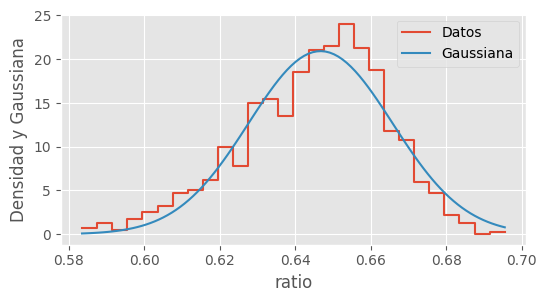

In [28]:
# Agregamos al gráfico de la densidad anterior la curva gaussiana con media approx_mean y desvio approx_deviation
# Graficamos la densidad junto con la gaussiana
plt.figure(figsize=(6, 3))
plt.step(x=data['ratio'],y=data['densidad'], label='Datos')
r = np.linspace(data['ratio'].min(), data['ratio'].max(), 100)
plt.plot(r, norm.pdf(r, approx_mean, approx_deviation), label='Gaussiana')
plt.legend()
plt.xlabel('ratio')
plt.ylabel('Densidad y Gaussiana')
plt.show()

# Un modelo más complejo: mezcla de gaussianas

In [29]:
# Definimos una mezcla de dos gaussianas
def gauss_mixture(x, mu1, mu2, sigma1, sigma2, pi):
  return pi * norm.pdf(x, mu1, sigma1) + (1 - pi) * norm.pdf(x, mu2, sigma2)

Considera la siguiente celda de código: ¿puedes encontrar valores de *pi*, *mu1*, *mu2*, *sigma1* y *sigma2* para que la curva de la mezcla de gaussianas aproxime la densidad de los datos?

In [ ]:
pi = None
mu1 = None
sigma1 = None
mu2 = None
sigma2 = None

# Graficamos la densidad junto con la mezcla de gaussiana
plt.figure(figsize=(6, 3))
plt.step(x=data['ratio'],y=data['densidad'], label='Datos')
r = np.linspace(data['ratio'].min(), data['ratio'].max(), 100)
plt.plot(r, gauss_mixture(r, mu1, mu2, sigma1, sigma2, pi), label='Mezcla de gaussiana')
plt.plot(r, pi*norm.pdf(r, mu1, sigma1), label='Gaussiana 1')
plt.plot(r, (1-pi)*norm.pdf(r, mu2, sigma2), label='Gaussiana 2')
plt.legend()
plt.xlabel('ratio')
plt.ylabel('Densidad y Gaussiana')
plt.show()

He aquí una solución posible:

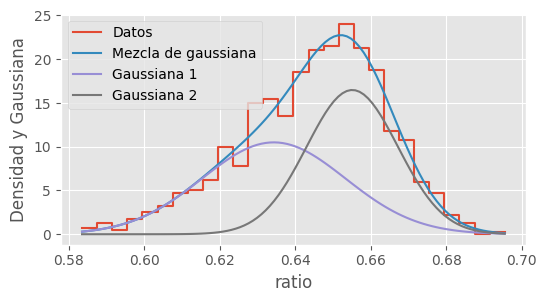

In [22]:
# Graficamos la densidad junto con la mezcla de gaussiana
plt.figure(figsize=(6, 3))
plt.step(x=data['ratio'],y=data['densidad'], label='Datos')
r = np.linspace(data['ratio'].min(), data['ratio'].max(), 100)
pi = 0.5
mu1 = .6343
sigma1 = .0190
mu2 = .6551
sigma2 = .0121
plt.plot(r, gauss_mixture(r, mu1, mu2, sigma1, sigma2, pi), label='Mezcla de gaussiana')
plt.plot(r, pi*norm.pdf(r, mu1, sigma1), label='Gaussiana 1')
plt.plot(r, (1-pi)*norm.pdf(r, mu2, sigma2), label='Gaussiana 2')
plt.legend()
plt.xlabel('ratio')
plt.ylabel('Densidad y Gaussiana')
plt.show()